# Net disbursements of official development assistance to recipients

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join(path, 'datasets', 'Net Disbursements from Official ODA from Donors.csv')
df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source,Unnamed: 7
0,0,Total,1975,Net official development assistance to develop...,20183.0,NaN,Organisation for Economic Co-operation and Dev...,NaN
1,0,Total,1985,Net official development assistance to develop...,33855.0,NaN,Organisation for Economic Co-operation and Dev...,NaN
2,0,Total,1995,Net official development assistance to develop...,65424.0,NaN,Organisation for Economic Co-operation and Dev...,NaN
3,0,Total,2005,Net official development assistance to develop...,120771.0,NaN,Organisation for Economic Co-operation and Dev...,NaN
4,0,Total,2010,Net official development assistance to develop...,147644.0,NaN,Organisation for Economic Co-operation and Dev...,NaN
...,...,...,...,...,...,...,...,...
560,97,European Union (EU),2005,Net official development assistance to develop...,9390.0,Development Assistance Committee member (OECD).,Refers to European Union institutions.,Organisation for Economic Co-operation and Dev...
561,97,European Union (EU),2010,Net official development assistance to develop...,12747.0,Development Assistance Committee member (OECD).,Refers to European Union institutions.,Organisation for Economic Co-operation and Dev...
562,97,European Union (EU),2015,Net official development assistance to develop...,13670.0,Development Assistance Committee member (OECD).,Refers to European Union institutions.,Organisation for Economic Co-operation and Dev...
563,97,European Union (EU),2018,Net official development assistance to develop...,17116.0,Development Assistance Committee member (OECD).,Refers to European Union institutions.,Organisation for Economic Co-operation and Dev...


In [5]:
df.shape

(565, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region/Country/Area  565 non-null    int64  
 1   Unnamed: 1           565 non-null    object 
 2   Year                 565 non-null    int64  
 3   Series               565 non-null    object 
 4   Value                565 non-null    float64
 5   Footnotes            443 non-null    object 
 6   Source               565 non-null    object 
 7   Unnamed: 7           37 non-null     object 
dtypes: float64(1), int64(2), object(5)
memory usage: 35.4+ KB


In [7]:
df.rename(                                                               # rename columns
    columns={
        'Region/Country/Area': 'Code', 
        'Unnamed: 1': 'Region/Country/Area'}, inplace=True)

df.head()   

,Code,Region/Country/Area,Year,Series,Value,Footnotes,Source,Unnamed: 7
0,0,Total,1975,Net official development assistance to develop...,20183.0,NaN,Organisation for Economic Co-operation and Dev...,NaN
1,0,Total,1985,Net official development assistance to develop...,33855.0,NaN,Organisation for Economic Co-operation and Dev...,NaN
2,0,Total,1995,Net official development assistance to develop...,65424.0,NaN,Organisation for Economic Co-operation and Dev...,NaN
3,0,Total,2005,Net official development assistance to develop...,120771.0,NaN,Organisation for Economic Co-operation and Dev...,NaN
4,0,Total,2010,Net official development assistance to develop...,147644.0,NaN,Organisation for Economic Co-operation and Dev...,NaN


In [8]:
df.drop(columns=['Footnotes', 'Source', 'Unnamed: 7'], inplace=True)      # drop footnotes, source and unnamed columns

In [9]:
df.head()

,Code,Region/Country/Area,Year,Series,Value
0,0,Total,1975,Net official development assistance to develop...,20183.0
1,0,Total,1985,Net official development assistance to develop...,33855.0
2,0,Total,1995,Net official development assistance to develop...,65424.0
3,0,Total,2005,Net official development assistance to develop...,120771.0
4,0,Total,2010,Net official development assistance to develop...,147644.0


In [10]:
df.describe(include='object')  

,Region/Country/Area,Series
count,565,565
unique,53,2
top,Ireland,Net official development assistance to develop...
freq,15,377


In [11]:
# helper function to get the unique values for different columns
def get_unique(df, colname):
  '''
  df: pandas dataframe
  colname: column name
  '''
  return df[colname].unique()

In [12]:
get_unique(df, 'Code')                                            

array([  0, 593,  36,  40,  31,  56, 100, 124, 191, 196, 203, 208, 233,
       246, 250, 276, 300, 348, 352, 372, 376, 380, 392, 398, 414, 428,
       438, 440, 442, 470, 528, 554, 578, 158, 616, 620, 634, 410, 642,
       643, 682, 703, 705, 724, 752, 756, 764, 626, 792, 784, 826, 840,
        97], dtype=int64)

In [13]:
get_unique(df, 'Region/Country/Area')                            

array(['Total', 'DAC total', 'Australia', 'Austria', 'Azerbaijan',
       'Belgium', 'Bulgaria', 'Canada', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kazakhstan', 'Kuwait', 'Latvia', 'Liechtenstein', 'Lithuania',
       'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway',
       'Other non-specified areas', 'Poland', 'Portugal', 'Qatar',
       'Republic of Korea', 'Romania', 'Russian Federation',
       'Saudi Arabia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Thailand', 'Timor-Leste', 'Turkey',
       'United Arab Emirates', 'United Kingdom',
       'United States of America', 'European Union (EU)'], dtype=object)

In [14]:
get_unique(df, 'Year')

array([1975, 1985, 1995, 2005, 2010, 2015, 2018, 2019, 2020], dtype=int64)

In [15]:
get_unique(df, 'Series')

array(['Net official development assistance to developing countries and multilateral organizations (millions of US$)',
       'Net official development assistance to developing countries and multilateral organizations (as % of GNI)'],
      dtype=object)

<AxesSubplot:xlabel='Value', ylabel='Density'>

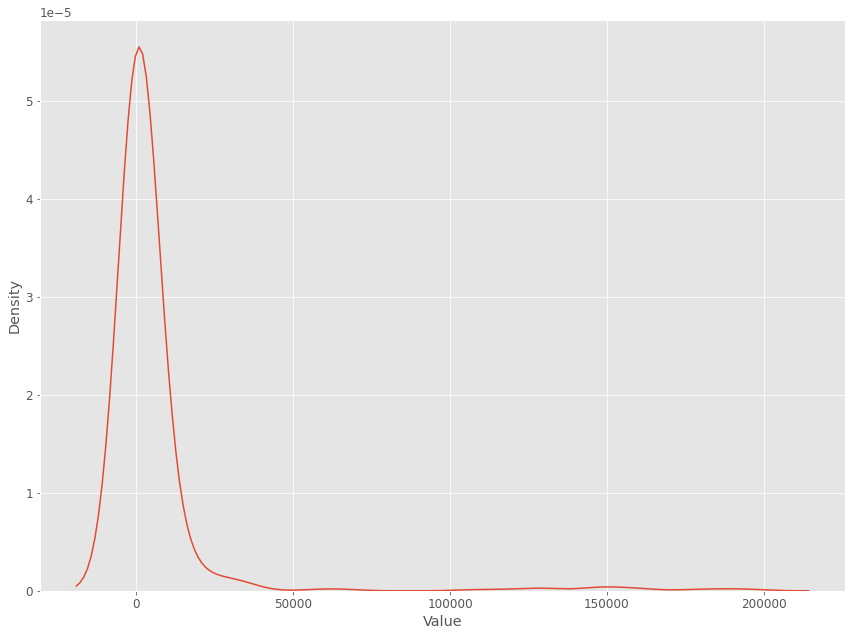

In [16]:
sns.kdeplot(data=df, x='Value')

# Missing Values Exploration

In [17]:
df.isna().sum()

Code                   0
Region/Country/Area    0
Year                   0
Series                 0
Value                  0
dtype: int64

# Grouping and Aggregation

In [18]:
df_grpd = df.groupby(['Region/Country/Area', 'Series'])
df_grpd.head()

,Code,Region/Country/Area,Year,Series,Value
0,0,Total,1975,Net official development assistance to develop...,20183.0
1,0,Total,1985,Net official development assistance to develop...,33855.0
2,0,Total,1995,Net official development assistance to develop...,65424.0
3,0,Total,2005,Net official development assistance to develop...,120771.0
4,0,Total,2010,Net official development assistance to develop...,147644.0
...,...,...,...,...,...
557,97,European Union (EU),1975,Net official development assistance to develop...,722.0
558,97,European Union (EU),1985,Net official development assistance to develop...,1510.0
559,97,European Union (EU),1995,Net official development assistance to develop...,5398.0
560,97,European Union (EU),2005,Net official development assistance to develop...,9390.0


# Data Visualization

In [19]:
from matplotlib.ticker import FuncFormatter

# helper function to format plot axis
def million(x, pos):
  return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(million)


def thousand(x, pos):
  return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)


def original(x, pos):
  return '%1.2f' % (x * 1)

format_orig = FuncFormatter(original)


# helper functions to visualize data
def plotting(data1, data2, x1, x2, y1, y2, title1=None, xlabel1=None, ylabel1=None, title2=None, xlabel2=None, ylabel2=None, formatter1=None, formatter2=None):
  fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
  fig.autofmt_xdate()

  # plot bar chart
  sns.barplot(
    data=data1, 
    x=x1, y=y1,
    ax=ax1
  )
  
  # label bar chart axes
  ax1.set(title=title1, xlabel=xlabel1, ylabel=ylabel1)

  # set yaxis formatter
  ax1.yaxis.set_major_formatter(formatter=formatter1)

   # plot line chart
  sns.lineplot(
    data=data2, 
    x=x2, y=y2, 
    ax=ax2
  )

  # label line chart axes
  ax2.set(title=title2, xlabel=xlabel2, ylabel=ylabel2)

  # set yaxis formatter
  ax2.yaxis.set_major_formatter(formatter=formatter2)

  return plotting

# Net official development assistance to developing countries and multilateral organizations (millions of US$) exploration

<function __main__.plotting(data1, data2, x1, x2, y1, y2, title1=None, xlabel1=None, ylabel1=None, title2=None, xlabel2=None, ylabel2=None, formatter1=None, formatter2=None)>

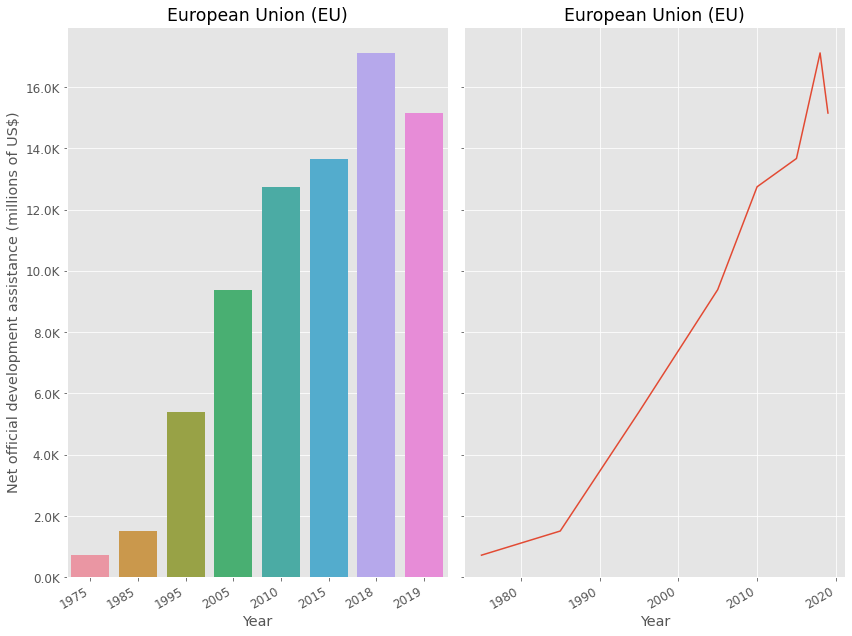

In [20]:
plotting(
  data1=df_grpd.get_group(('European Union (EU)', 'Net official development assistance to developing countries and multilateral organizations (millions of US$)')),
  x1='Year', y1='Value',
  title1='European Union (EU)',
  xlabel1='Year', ylabel1='Net official development assistance (millions of US$)',
  formatter1=format_tsd,

  data2=df_grpd.get_group(('European Union (EU)', 'Net official development assistance to developing countries and multilateral organizations (millions of US$)')),
  x2='Year', y2='Value',
  title2='European Union (EU)', xlabel2='Year', ylabel2='Net official development assistance (millions of US$)',
  formatter2=format_tsd
)

<function __main__.plotting(data1, data2, x1, x2, y1, y2, title1=None, xlabel1=None, ylabel1=None, title2=None, xlabel2=None, ylabel2=None, formatter1=None, formatter2=None)>

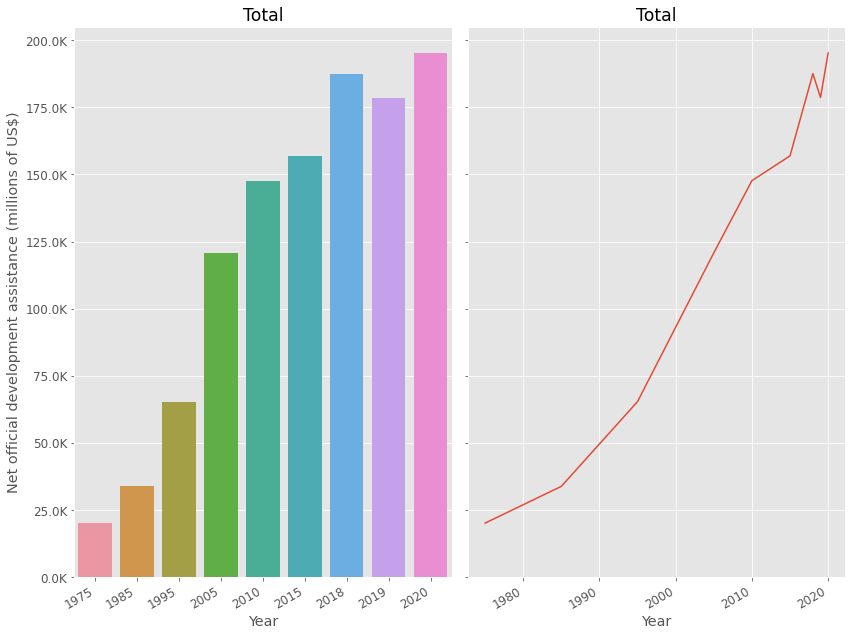

In [21]:
plotting(
  data1=df_grpd.get_group(('Total', 'Net official development assistance to developing countries and multilateral organizations (millions of US$)')),
  x1='Year', y1='Value',
  title1='Total',
  xlabel1='Year', ylabel1='Net official development assistance (millions of US$)',
  formatter1=format_tsd,

  data2=df_grpd.get_group(('Total', 'Net official development assistance to developing countries and multilateral organizations (millions of US$)')),
  x2='Year', y2='Value',
  title2='Total', xlabel2='Year', ylabel2='Net official development assistance (millions of US$)',
  formatter2=format_tsd
)

# Net official development assistance to developing countries and multilateral organizations (as % of GNI) exploration

<function __main__.plotting(data1, data2, x1, x2, y1, y2, title1=None, xlabel1=None, ylabel1=None, title2=None, xlabel2=None, ylabel2=None, formatter1=None, formatter2=None)>

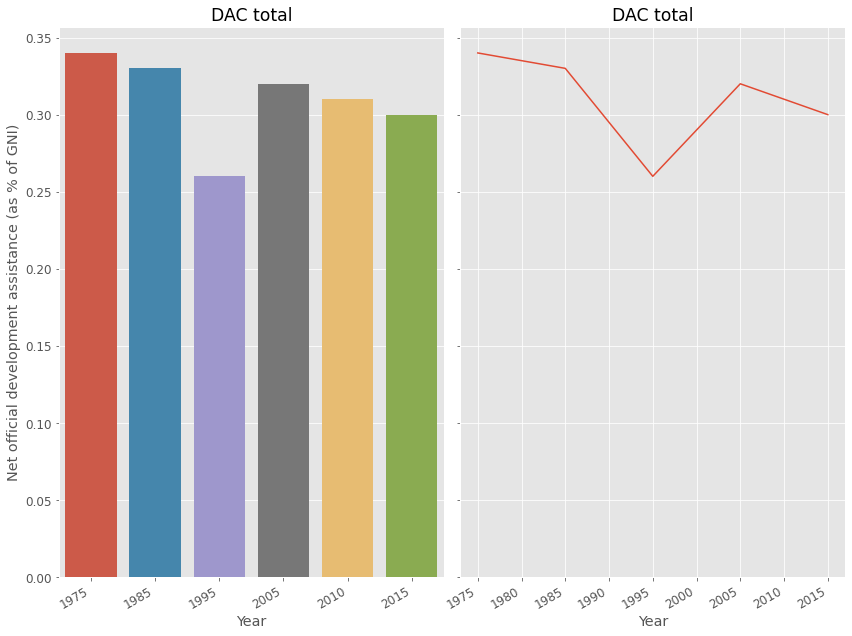

In [22]:
plotting(
  data1=df_grpd.get_group(('DAC total', 'Net official development assistance to developing countries and multilateral organizations (as % of GNI)')),
  x1='Year', y1='Value',
  title1='DAC total',
  xlabel1='Year', ylabel1='Net official development assistance (as % of GNI)',
  formatter1=format_orig,

  data2=df_grpd.get_group(('DAC total', 'Net official development assistance to developing countries and multilateral organizations (as % of GNI)')),
  x2='Year', y2='Value',
  title2='DAC total', xlabel2='Year', ylabel2='Net official development assistance (as % of GNI)',
  formatter2=format_orig
)

<function __main__.plotting(data1, data2, x1, x2, y1, y2, title1=None, xlabel1=None, ylabel1=None, title2=None, xlabel2=None, ylabel2=None, formatter1=None, formatter2=None)>

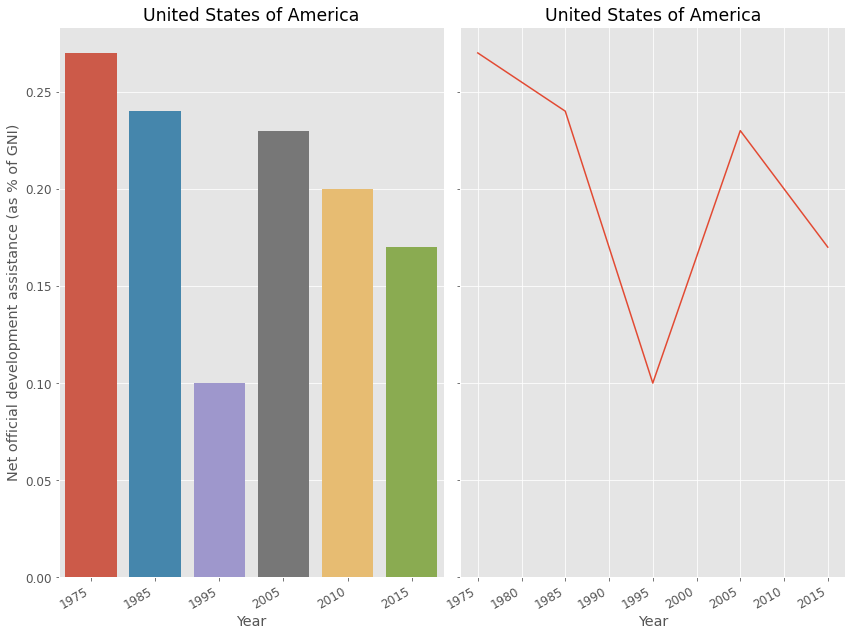

In [23]:
plotting(
  data1=df_grpd.get_group(('United States of America', 'Net official development assistance to developing countries and multilateral organizations (as % of GNI)')),
  x1='Year', y1='Value',
  title1='United States of America',
  xlabel1='Year', ylabel1='Net official development assistance (as % of GNI)',
  formatter1=format_orig,

  data2=df_grpd.get_group(('United States of America', 'Net official development assistance to developing countries and multilateral organizations (as % of GNI)')),
  x2='Year', y2='Value',
  title2='United States of America', xlabel2='Year', ylabel2='Net official development assistance (as % of GNI)',
  formatter2=format_orig
)